### import package

In [1]:
# import package
import pandas as pd 
import random
import numpy as np 
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from seaborn import regplot
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm
from scipy.stats import gamma,expon,norm,chi2
import pybaseball

In [2]:
Batting     = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\Batting.csv');
People      = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\People.csv');
Salaries    = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\Salaries.csv');
Fielding    = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\Fielding.csv');
Appearances = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\Appearances.csv');

In [3]:
mbb = pd.read_csv('mbb_1990.csv').drop('Unnamed: 0',axis=1)
merge_field = pd.read_csv('merge_field.csv').drop('Unnamed: 0',axis=1)
m_fs = pd.read_csv('target.csv').drop('Unnamed: 0',axis=1)

### merge data = field + batting + salary

In [4]:
data = mbb.merge(merge_field[['playerID', 'yearID', 'POS', 'GS',
       'InnOuts', 'PO', 'A', 'E', 'DP']]).drop_duplicates(subset=['playerID','yearID'])
data = data.merge(m_fs[['playerID','yearID','salary']]).drop_duplicates(subset=['playerID','yearID'])
data = data[data['POS']!='P']

In [5]:
# the team from 2003 to 2015 did not change teamID
team_id = data[data['yearID']==2003].drop_duplicates(subset=['teamID']).merge(data[data['yearID']==2015].drop_duplicates(subset=['teamID'])['teamID'])[['teamID']]

In [6]:
data = data.merge(team_id['teamID'])

In [7]:
data.head()

,playerID,yearID,seniority,teamID,lgID,G,AB,R,H,2B,...,GIDP,age,POS,GS,InnOuts,PO,A,E,DP,salary
0,dempsri01,1990,22,LAN,NL,62,128,13,25,5,...,8,41,C,33,944,213,27,2,3,150000
1,cartega01,1991,18,LAN,NL,101,248,22,61,14,...,11,37,1B,59,1656,402,52,5,5,825000
2,randowi01,1990,16,LAN,NL,119,388,52,101,13,...,14,36,2B,106,2757,198,313,11,72,500000
3,griffal01,1990,15,LAN,NL,141,461,38,97,11,...,5,33,SS,136,3464,221,382,26,63,900000
4,griffal01,1991,16,LAN,NL,109,350,27,85,6,...,5,34,SS,107,2801,186,349,22,45,637500


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
yearID,9531.0,2.002475e+03,7.444068e+00,1990.0,1996.0,2002.0,2009.0,2015.0
seniority,9531.0,6.214563e+00,4.091301e+00,1.0,3.0,5.0,9.0,23.0
G,9531.0,9.993778e+01,4.601346e+01,1.0,66.0,109.0,140.5,163.0
AB,9531.0,3.304262e+02,1.883187e+02,0.0,166.0,338.0,497.0,716.0
R,9531.0,4.645242e+01,3.139765e+01,0.0,20.0,43.0,70.0,152.0
H,9531.0,8.957633e+01,5.549079e+01,0.0,41.5,88.0,136.0,262.0
2B,9531.0,1.761914e+01,1.189497e+01,0.0,8.0,16.0,26.0,59.0
3B,9531.0,1.943448e+00,2.347567e+00,0.0,0.0,1.0,3.0,23.0
HR,9531.0,1.045011e+01,1.028453e+01,0.0,2.0,7.0,15.0,73.0
RBI,9531.0,4.421572e+01,3.206334e+01,0.0,18.0,39.0,65.0,165.0


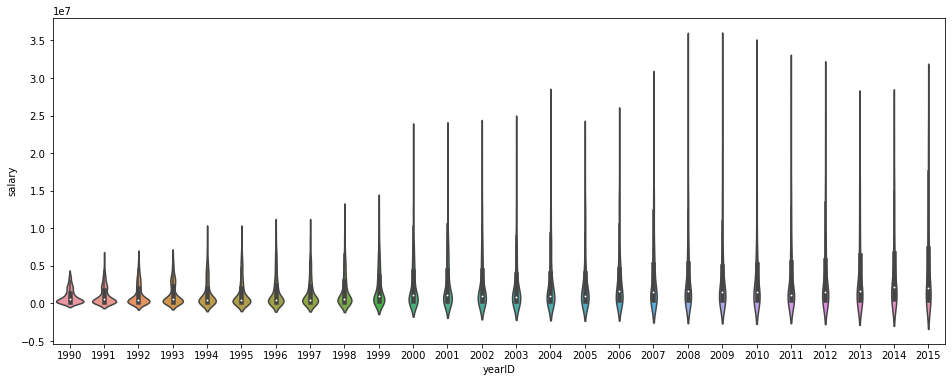

Text(0, 0.5, 'salary(log scale)')

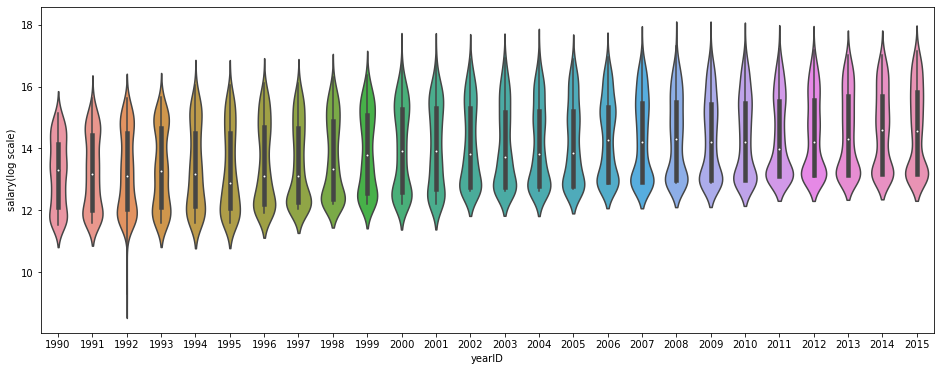

In [9]:
# every year's salary violinplot
plt.figure(figsize=(16,6))
sns.violinplot(x = data['yearID'],y = data['salary'])
plt.show()
plt.figure(figsize=(16,6))
sns.violinplot(x = data['yearID'],y = np.log(data['salary']))
plt.ylabel('salary(log scale)')

In [10]:
# the league’s basic salary rules were implemented in 2004
data03 = data[data['yearID']>=2003]

In [11]:
local_player = People[People['birthCountry']=='USA']

In [12]:
data3 = data03.merge(local_player['playerID'])

In [13]:
data3.head()

,playerID,yearID,seniority,teamID,lgID,G,AB,R,H,2B,...,GIDP,age,POS,GS,InnOuts,PO,A,E,DP,salary
0,gonzalu01,2007,18,LAN,NL,139,464,70,129,23,...,11,40,OF,126,2988,192,4,1,0,2000000
1,gonzalu01,2003,14,ARI,NL,156,579,92,176,46,...,19,36,OF,154,4078,249,9,3,1,8250000
2,gonzalu01,2004,15,ARI,NL,105,379,69,98,28,...,9,37,OF,103,2701,162,2,6,0,10083333
3,gonzalu01,2005,16,ARI,NL,155,579,90,157,37,...,14,38,OF,149,3955,270,7,3,1,10673328
4,gonzalu01,2006,17,ARI,NL,153,586,93,159,52,...,14,39,OF,149,3945,256,3,1,1,7156599


In [14]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
yearID,3332.0,2.008961e+03,3.741454e+00,2003.0,2006.00,2009.0,2012.00,2015.0
seniority,3332.0,6.093037e+00,3.999518e+00,1.0,3.00,5.0,9.00,21.0
G,3332.0,1.031080e+02,4.455531e+01,1.0,70.00,113.0,142.00,162.0
AB,3332.0,3.441360e+02,1.832607e+02,1.0,187.00,356.5,505.00,716.0
R,3332.0,4.774820e+01,2.990773e+01,0.0,23.00,45.0,71.00,143.0
H,3332.0,9.209454e+01,5.353919e+01,0.0,46.00,91.5,136.00,221.0
2B,3332.0,1.882263e+01,1.191290e+01,0.0,9.00,18.0,27.00,56.0
3B,3332.0,1.963385e+00,2.369724e+00,0.0,0.00,1.0,3.00,23.0
HR,3332.0,1.113655e+01,9.735081e+00,0.0,3.00,9.0,17.00,58.0
RBI,3332.0,4.529442e+01,3.015609e+01,0.0,20.00,42.0,66.25,156.0


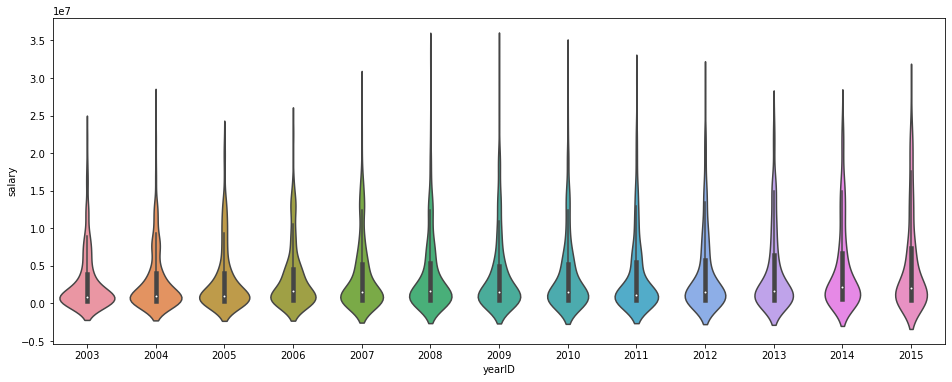

Text(0, 0.5, 'salary(log scale)')

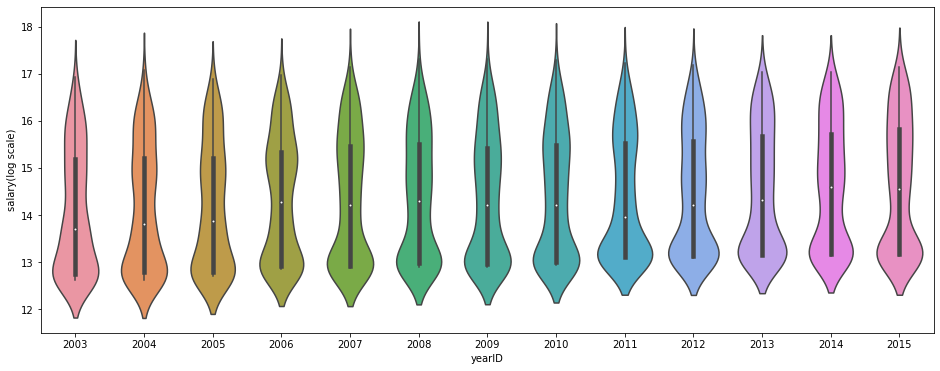

In [15]:
# every year's salary violinplot
plt.figure(figsize=(16,6))
sns.violinplot(x = data03['yearID'],y = data03['salary'])
plt.show()
plt.figure(figsize=(16,6))
sns.violinplot(x = data03['yearID'],y = np.log(data03['salary']))
plt.ylabel('salary(log scale)')

In [16]:
data3[data3['seniority']<=2][['yearID','salary']].describe().T.loc[['salary']]

,count,mean,std,min,25%,50%,75%,max
salary,706.0,461397.152975,228836.15673,300000.0,390177.0,421000.0,502500.0,3625000.0


In [17]:
data3[data3['seniority']>=3][['yearID','salary']].describe().T.loc[['salary']]

,count,mean,std,min,25%,50%,75%,max
salary,2626.0,4.488903e+06,5.158422e+06,300000.0,750000.0,2500000.0,6300000.0,33000000.0


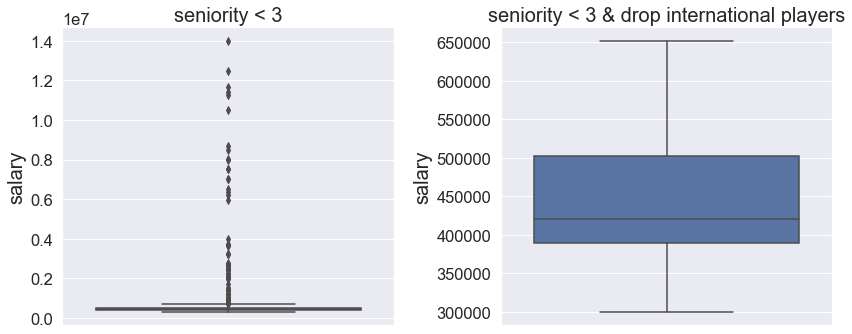

In [18]:
# since league have the batter who is from the country out of America, these batter's salary is high from begin
sns.set(font_scale=1.5)

plt.figure(figsize=(12,5))
s3 = data03[data03['seniority']<=2]
plt.subplot(1,2,1)
sns.boxplot(y = s3['salary'])
plt.title('seniority < 3', fontsize=20)
plt.ylabel('salary', fontsize=20)

plt.subplot(1,2,2)
for i in range(2):
    Q1 = int(s3[['yearID','salary']].describe().T.loc[['salary']]['25%'].values)
    Q3 = int(s3[['yearID','salary']].describe().T.loc[['salary']]['75%'].values)
    IQR = Q3-Q1
    s3 = s3[s3['salary']<=IQR*1.5+Q3]# (Q3-Q1)*1.5 + Q3

sns.boxplot(y = (s3['salary']))
plt.title('seniority < 3 & drop international players', fontsize=20)
plt.ylabel('salary', fontsize=20)
plt.tight_layout()
plt.savefig('h')

C:\Users\ASUS\anaconda3\envs\tensorflow2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

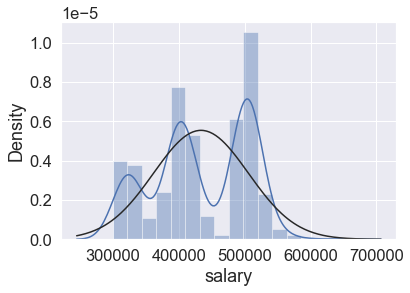

In [19]:
sns.distplot((s3['salary']), fit=norm)

<AxesSubplot:>

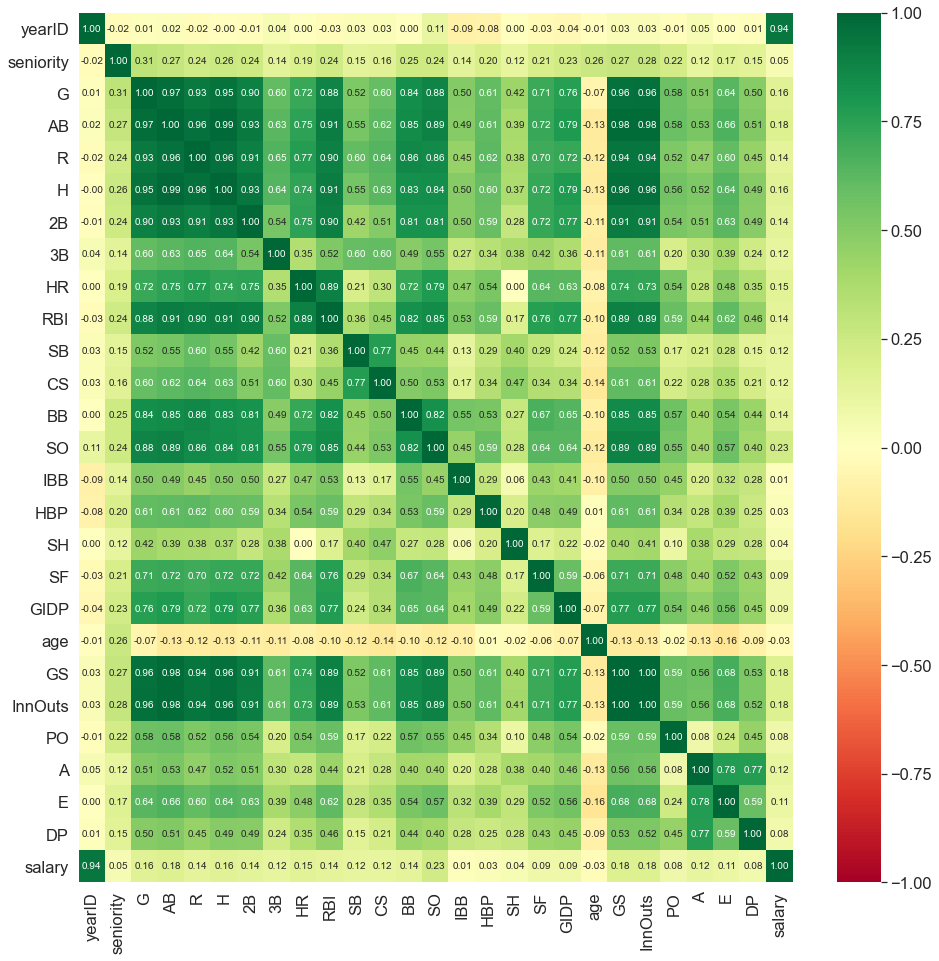

In [20]:
sns.set(font_scale=1.5)
plt.figure(figsize=(16,16))
f = s3.drop_duplicates(subset=['playerID','salary'])
sns.heatmap(f.corr(), annot=True, 
            annot_kws={"size": 10}, fmt=".2f", vmin=-1, vmax=1, cmap="RdYlGn")#.get_figure().savefig('heatmap')

Text(0.5, 1.0, 'natural log of salary')

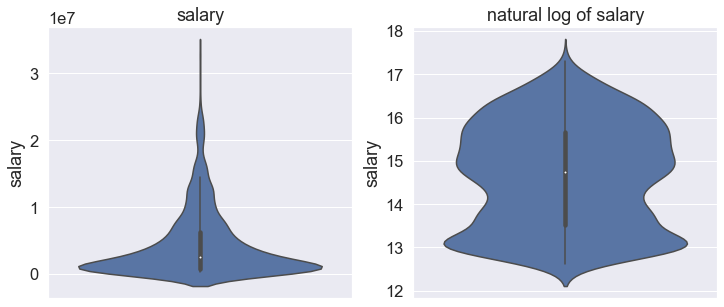

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.violinplot(y = (data3[data3['seniority']>=3]['salary']))
plt.title('salary')
plt.subplot(1,2,2)
sns.violinplot(y = np.log(data3[data3['seniority']>=3]['salary']))
plt.title('natural log of salary')

C:\Users\ASUS\anaconda3\envs\tensorflow2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

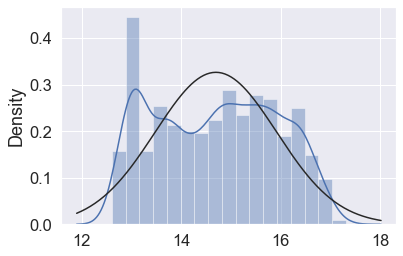

In [22]:
sns.distplot(x = np.log(data03[data03['seniority']>=3]['salary']), fit=norm)

<AxesSubplot:>

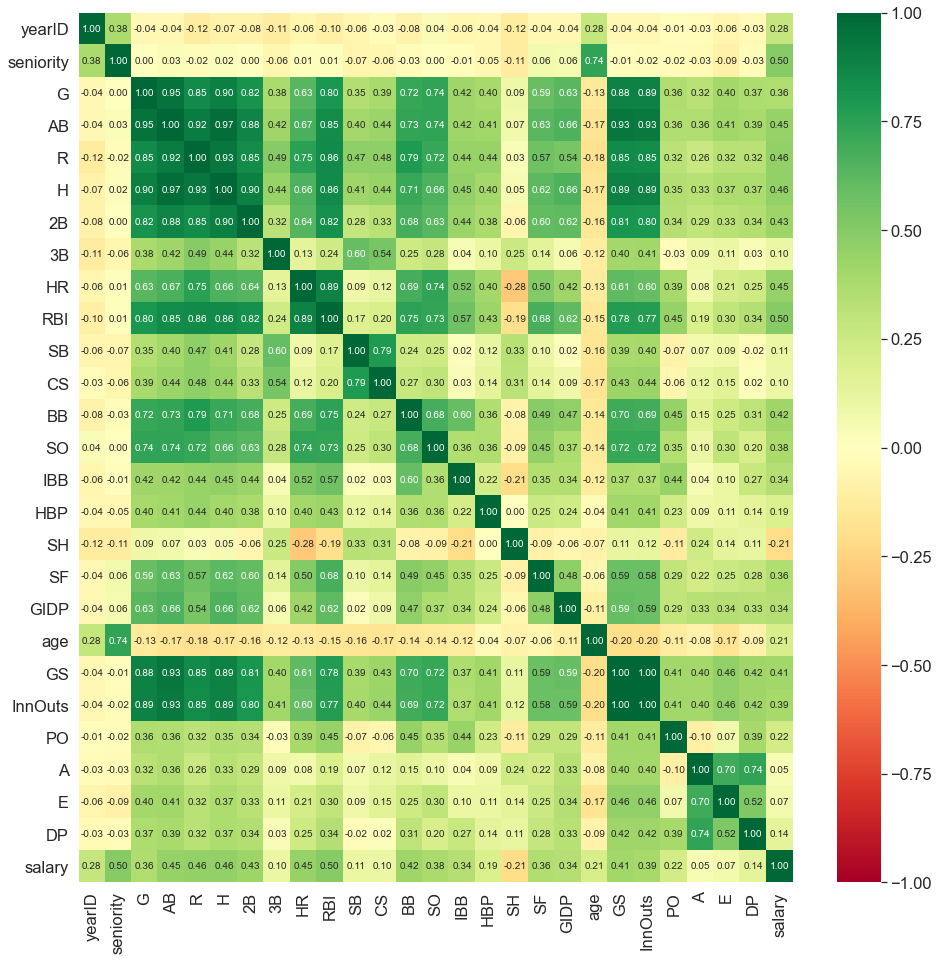

In [23]:
sns.set(font_scale=1.5)
plt.figure(figsize=(16,16))
f = data03[data03['seniority']>=4].merge(s3[['playerID']]).drop_duplicates(subset=['playerID','salary'])
sns.heatmap(f.corr(), annot=True, 
            annot_kws={"size": 10}, fmt=".2f", vmin=-1, vmax=1, cmap="RdYlGn")

In [24]:
Data = pd.concat([s3,data03[data03['seniority']>=3].merge(s3[['playerID']]).drop_duplicates(subset=['playerID','yearID'])])

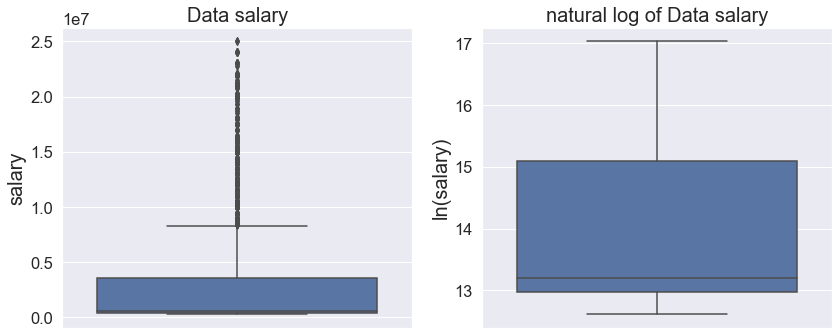

In [25]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Data salary', fontsize=20)
plt.ylabel('salary',fontsize=20)
sns.boxplot(y = Data['salary'])
plt.subplot(1,2,2)
plt.title('natural log of Data salary', fontsize=20)
sns.boxplot(y = np.log(Data['salary']))
plt.ylabel('ln(salary)', fontsize=20)
plt.tight_layout()
plt.savefig('k')

In [26]:
Data[['playerID', 'teamID', 'lgID', 'yearID', 'G', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
       'POS', 'GS', 'InnOuts', 'PO', 'A', 'E', 'DP', 'seniority', 'age',
       'salary']].describe().T

,count,mean,std,min,25%,50%,75%,max
yearID,2615.0,2.010380e+03,3.352429e+00,2003.0,2008.0,2011.0,2013.0,2015.0
G,2615.0,9.738509e+01,4.728222e+01,1.0,58.0,106.0,140.0,163.0
AB,2615.0,3.272654e+02,1.902943e+02,1.0,161.5,331.0,499.0,696.0
R,2615.0,4.425086e+01,2.957172e+01,0.0,19.0,41.0,67.0,136.0
H,2615.0,8.758662e+01,5.504164e+01,0.0,40.0,85.0,134.0,225.0
2B,2615.0,1.776405e+01,1.202477e+01,0.0,8.0,17.0,27.0,55.0
3B,2615.0,2.033652e+00,2.523724e+00,0.0,0.0,1.0,3.0,23.0
HR,2615.0,9.839388e+00,9.146988e+00,0.0,2.0,7.0,15.0,58.0
RBI,2615.0,4.148145e+01,2.978033e+01,0.0,16.0,38.0,62.0,149.0
SB,2615.0,6.483748e+00,9.732361e+00,0.0,0.0,3.0,8.0,78.0


<ipython-input-27-2c6ce7b0cd83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['ln(salary)']=np.log(f['salary'])


<AxesSubplot:>

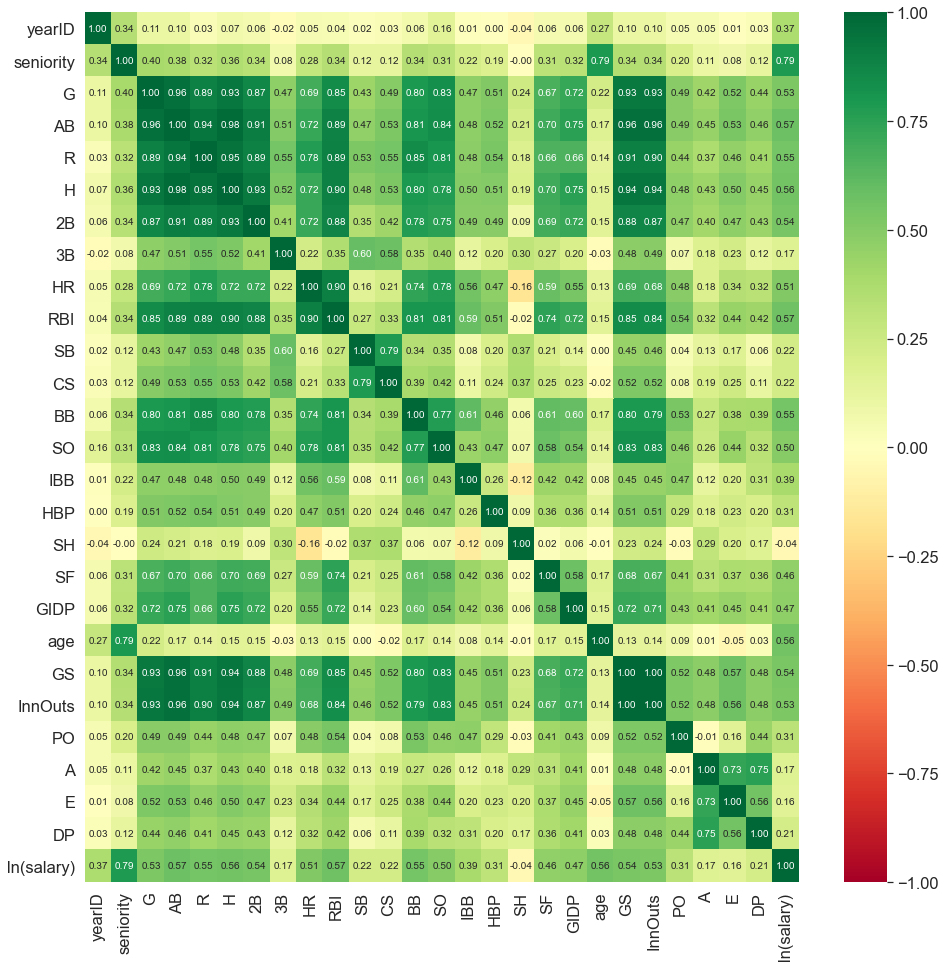

In [27]:
plt.figure(figsize=(16,16))
f = Data.drop_duplicates(subset=['playerID','salary'])
f['ln(salary)']=np.log(f['salary'])
sns.heatmap(f.drop('salary',axis=1).corr()[['yearID','seniority','G','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','SO','IBB','HBP','SH','SF','GIDP',
                                    'age','GS','InnOuts','PO','A','E','DP','ln(salary)']], annot=True, 
            annot_kws={"size": 10}, fmt=".2f",vmin=-1,vmax=1, cmap="RdYlGn")#.get_figure().savefig('origin')

In [28]:
cb = pd.read_csv('important.csv').drop('Unnamed: 0',axis=1)

In [29]:
cb_ = cb.drop_duplicates(subset=['playerID','yearID']).drop('stint',axis=1).merge(Data[['playerID', 'yearID', 'seniority', 'teamID', 'lgID',
        'age','salary']]).drop_duplicates(subset=['playerID','yearID'])
#cb_['salary'] = np.log(cb_['salary'])

<ipython-input-48-2bba4a5dfb13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['ln(salary)']=np.log(f['salary'])


<AxesSubplot:>

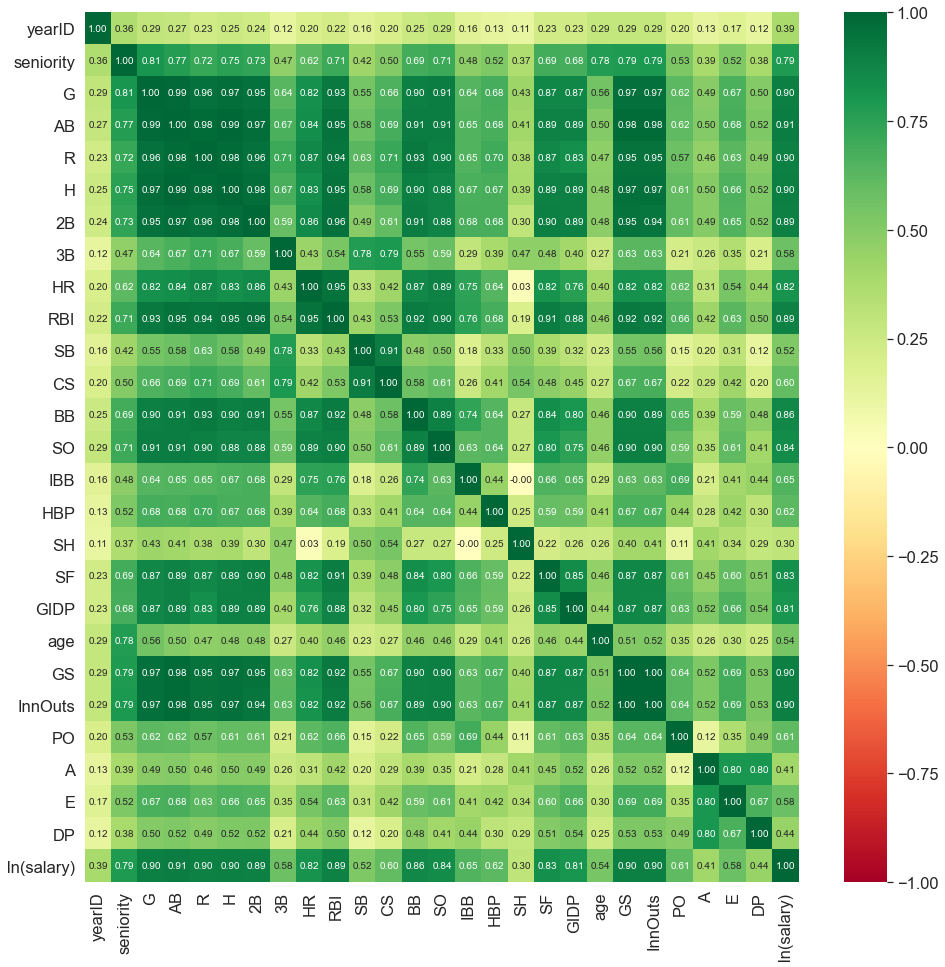

In [48]:
plt.figure(figsize=(16,16))
f = cb_.drop_duplicates(subset=['playerID','salary'])
f['ln(salary)']=np.log(f['salary'])
sns.heatmap(f[f['yearID']<2015].drop('salary',axis=1)[['yearID','seniority','G','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','SO','IBB','HBP','SH','SF','GIDP',
                                    'age','GS','InnOuts','PO','A','E','DP','ln(salary)']].corr(), annot=True, 
            annot_kws={"size": 10},vmin=-1,vmax=1, fmt=".2f", cmap="RdYlGn")#.get_figure().savefig('heatmap')

In [65]:
f.corr()[f.corr()['H']<=0.8][['H']].T.drop('salary',axis=1).columns

Index(['yearID', '3B', 'SB', 'CS', 'IBB', 'HBP', 'SH', 'PO', 'A', 'E', 'DP',
       'seniority', 'age'],
      dtype='object')

<ipython-input-63-9bfb19e76a2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['ln(salary)']=np.log(f['salary'])


<AxesSubplot:>

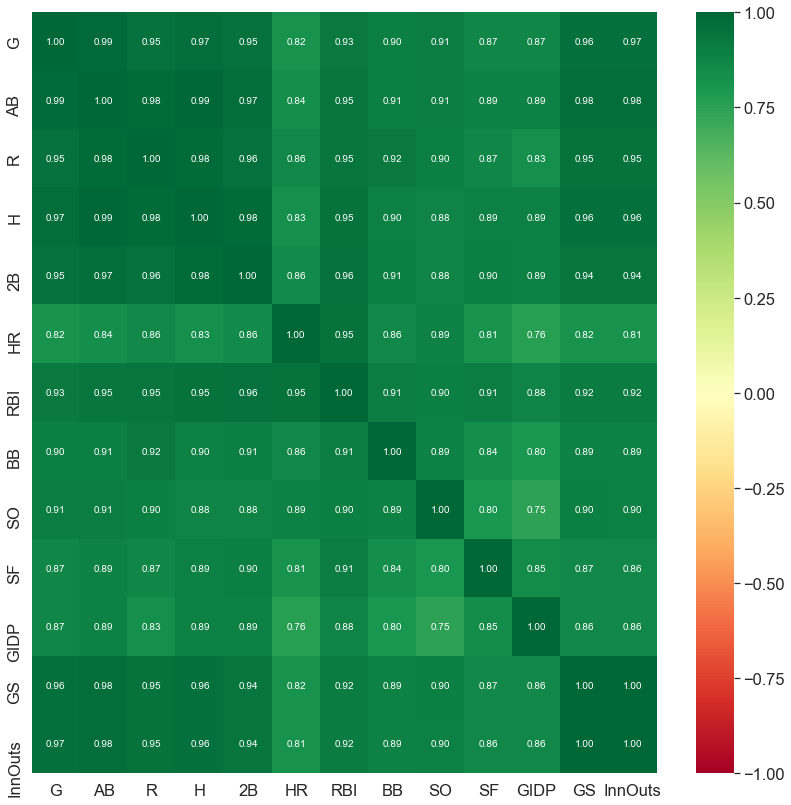

In [63]:
plt.figure(figsize=(14,14))
f = cb_.drop_duplicates(subset=['playerID','salary'])
f['ln(salary)']=np.log(f['salary'])
sns.heatmap(f[f.corr()[f.corr()['ln(salary)']>0.8][['ln(salary)']].T.drop(['salary','ln(salary)'],axis=1).columns].corr(), annot=True, 
            annot_kws={"size": 10},vmin=-1,vmax=1, fmt=".2f", cmap="RdYlGn")#.get_figure().savefig('heatmap')

<ipython-input-71-57f7022808de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['ln(salary)']=np.log(f['salary'])


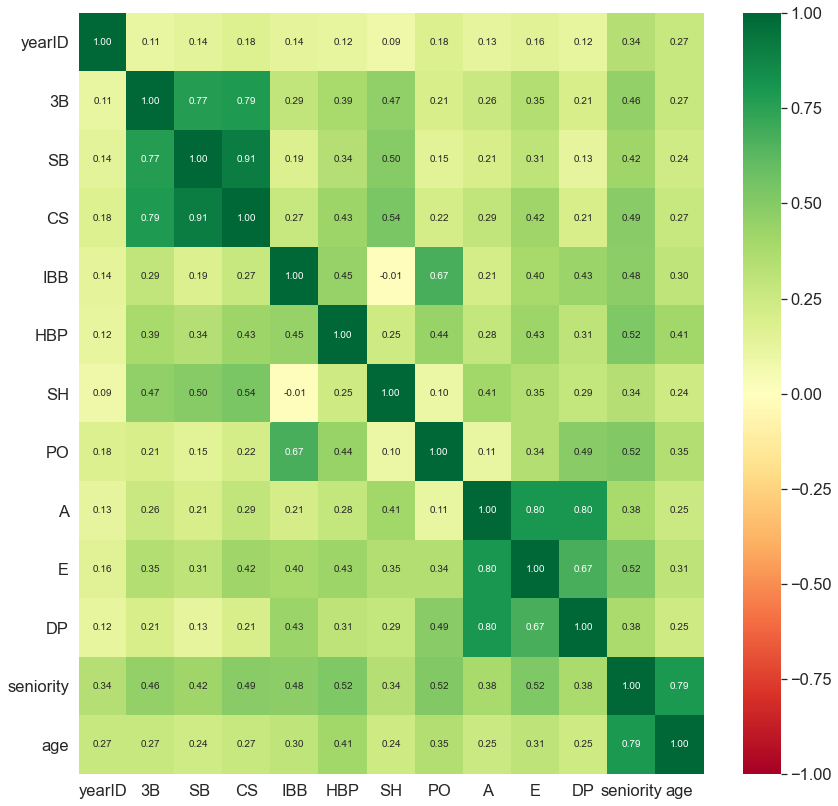

In [71]:
#######################other####################################
plt.figure(figsize=(14,14))
f = cb_.drop_duplicates(subset=['playerID','salary'])
f['ln(salary)']=np.log(f['salary'])
sns.heatmap(f[['yearID', '3B', 'SB', 'CS', 'IBB', 'HBP', 'SH', 'PO', 'A', 'E', 'DP',
       'seniority', 'age']].corr(), annot=True, 
            annot_kws={"size": 10},vmin=-1,vmax=1, fmt=".2f", cmap="RdYlGn")#.get_figure().savefig('hmap')

In [46]:
cb_.describe().T

,count,mean,std,min,25%,50%,75%,max
yearID,2615.0,2.010380e+03,3.352429e+00,2003.0,2008.0,2011.0,2013.0,2015.0
G,2615.0,3.113553e+02,2.268737e+02,2.0,102.5,272.0,503.0,809.0
AB,2615.0,1.059388e+03,8.545432e+02,1.0,296.0,852.0,1739.5,3144.0
R,2615.0,1.467484e+02,1.286766e+02,0.0,37.0,108.0,235.0,553.0
H,2615.0,2.861598e+02,2.415106e+02,0.0,74.0,223.0,469.5,978.0
2B,2615.0,5.827686e+01,5.052442e+01,0.0,14.5,43.0,94.0,224.0
3B,2615.0,6.936138e+00,8.646955e+00,0.0,1.0,4.0,10.0,69.0
HR,2615.0,3.253843e+01,3.560922e+01,0.0,5.0,19.0,50.0,229.0
RBI,2615.0,1.369568e+02,1.263562e+02,0.0,32.0,98.0,219.0,680.0
SB,2615.0,2.222753e+01,3.572496e+01,0.0,2.0,8.0,27.0,277.0


### each feature histgram

### batting and salary relationship scatter figures

In [34]:
w=5

In [35]:
##################################################### important#################################################################
# window cumulation batting table
Batting = Batting.fillna(0)
Batting = Batting[Batting['yearID']>=1980]

cbt = pd.DataFrame()
for i in Batting.drop_duplicates(subset=['playerID'])['playerID']:
    g = Batting[Batting['playerID']==i]
    k = g.rolling(window=w,min_periods=1).sum()#np.cumsum(g),win_type='triang'
    k['playerID']=i
    k['yearID']=g['yearID']
    k['teamID']=g['teamID']
    k['lgID']=g['lgID']
    k = k[['playerID','teamID', 'lgID','yearID', 'stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']]
    cbt = pd.concat([cbt,k])
cbt

,playerID,teamID,lgID,yearID,stint,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
57378,aasedo01,CAL,AL,1980,1.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58328,aasedo01,CAL,AL,1981,2.0,79.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59272,aasedo01,CAL,AL,1982,3.0,103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61270,aasedo01,CAL,AL,1984,4.0,126.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62254,aasedo01,BAL,AL,1985,5.0,180.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108771,yajurmi01,NYA,AL,2020,1.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108772,yamagsh01,TOR,AL,2020,1.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108781,youngan02,ARI,NL,2020,1.0,12.0,26.0,3.0,5.0,2.0,...,4.0,0.0,0.0,5.0,10.0,0.0,3.0,0.0,0.0,0.0
108784,zimmebr02,BAL,AL,2020,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
##################################################### important#################################################################
# window cumulation batting table
field = merge_field.fillna(0)
field = field[field['yearID']>=1980]

cbf = pd.DataFrame()
for i in field.drop_duplicates(subset=['playerID'])['playerID']:
    g = field[field['playerID']==i]
    k = g.rolling(window=w,min_periods=1).sum()#np.cumsum(g),win_type='triang'
    k['playerID']=i
    k['yearID']=g['yearID']
    k['teamID']=g['teamID']
    k['lgID']=g['lgID']
    k['POS']=g['POS']
    k = k[['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'POS', 'G', 'GS',
       'InnOuts', 'PO', 'A', 'E', 'DP', 'PB', 'WP', 'SB_c', 'CS_c', 'ZR']]
    cbf = pd.concat([cbf,k])
cbf

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB_c,CS_c,ZR
11,dempsri01,1980,3.0,BAL,AL,1B,120.0,95.0,2690.0,544.0,55.0,8.0,10.0,5.0,0.0,53.0,45.0,0.0
12,dempsri01,1981,4.0,BAL,AL,C,210.0,166.0,4683.0,928.0,90.0,9.0,16.0,9.0,0.0,83.0,69.0,0.0
13,dempsri01,1982,5.0,BAL,AL,C,334.0,267.0,7515.0,1419.0,136.0,14.0,24.0,14.0,0.0,130.0,96.0,0.0
14,dempsri01,1983,6.0,BAL,AL,C,462.0,376.0,10484.0,2010.0,201.0,16.0,31.0,15.0,0.0,190.0,131.0,0.0
15,dempsri01,1984,7.0,BAL,AL,C,570.0,480.0,13207.0,2463.0,244.0,20.0,36.0,19.0,0.0,249.0,154.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20323,sanchga02,2017,3.0,NYA,AL,1B,142.0,135.0,3600.0,1246.0,94.0,16.0,6.0,22.0,0.0,56.0,36.0,0.0
20324,sanchga02,2018,4.0,NYA,AL,C,218.0,209.0,5559.0,1977.0,129.0,22.0,11.0,40.0,0.0,84.0,48.0,0.0
20325,sanchga02,2019,5.0,NYA,AL,C,308.0,295.0,7787.0,2770.0,161.0,37.0,16.0,47.0,0.0,120.0,59.0,0.0
20326,sanchga02,2020,6.0,NYA,AL,C,349.0,333.0,8752.0,3117.0,175.0,43.0,18.0,52.0,0.0,133.0,64.0,0.0


In [37]:
##################################################### important#################################################################
cb = cbt.drop_duplicates(subset=['playerID','yearID']).merge(cbf.drop_duplicates(subset=['playerID','yearID'])[['playerID', 'yearID', 'POS', 'GS',
       'InnOuts', 'PO', 'A', 'E', 'DP']])

In [38]:
cb_ = cb.drop_duplicates(subset=['playerID','yearID']).drop('stint',axis=1).merge(Data[['playerID', 'yearID', 'seniority', 'teamID', 'lgID',
        'age','salary']]).drop_duplicates(subset=['playerID','yearID'])
#cb_['salary'] = np.log(cb_['salary'])

<ipython-input-43-d68384a0aebe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['ln(salary)']=np.log(f['salary'])


<AxesSubplot:>

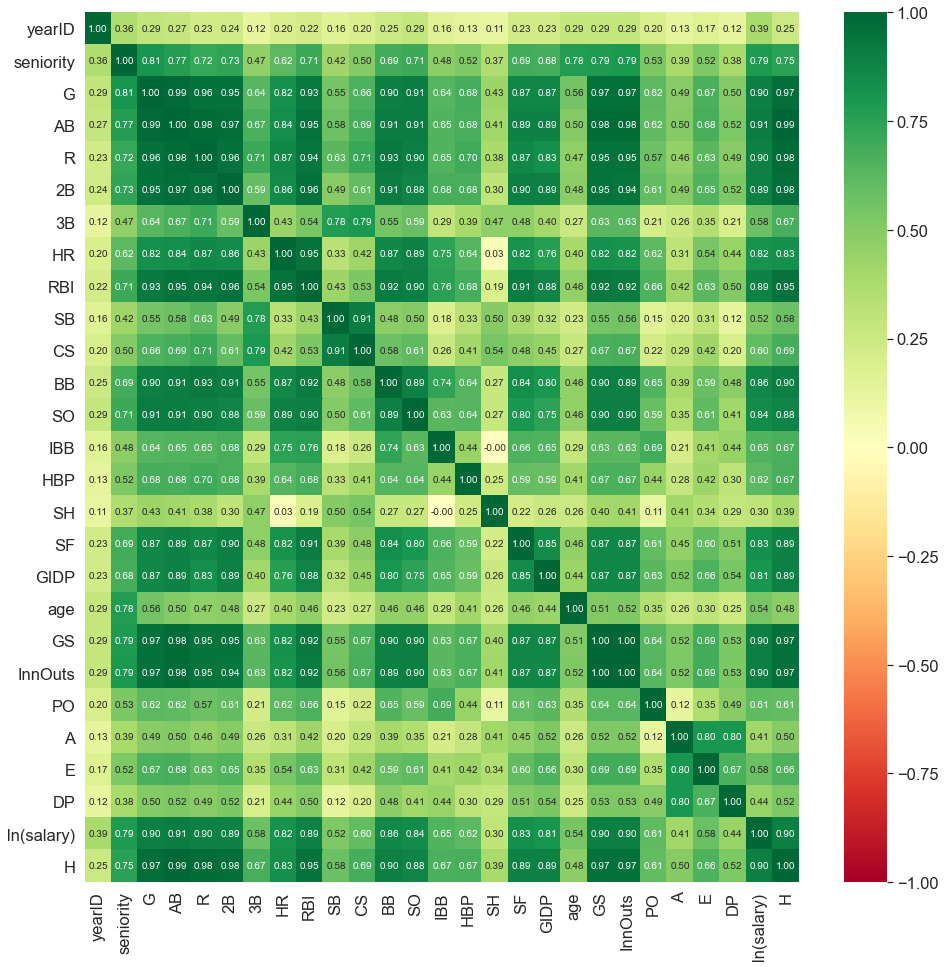

In [43]:
plt.figure(figsize=(16,16))
f = cb_.drop_duplicates(subset=['playerID','salary'])
f['ln(salary)']=np.log(f['salary'])
sns.heatmap(f[f['yearID']<2015].drop('salary',axis=1)[['yearID','seniority','G','AB','R','2B','3B','HR','RBI','SB','CS','BB','SO','IBB','HBP','SH','SF','GIDP',
                                    'age','GS','InnOuts','PO','A','E','DP','ln(salary)','H']].corr(), annot=True, 
            annot_kws={"size": 10},vmin=-1,vmax=1, fmt=".2f", cmap="RdYlGn")#.get_figure().savefig('window{}'.format(w))

<ipython-input-69-de66934435f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['ln(salary)']=np.log(f['salary'])


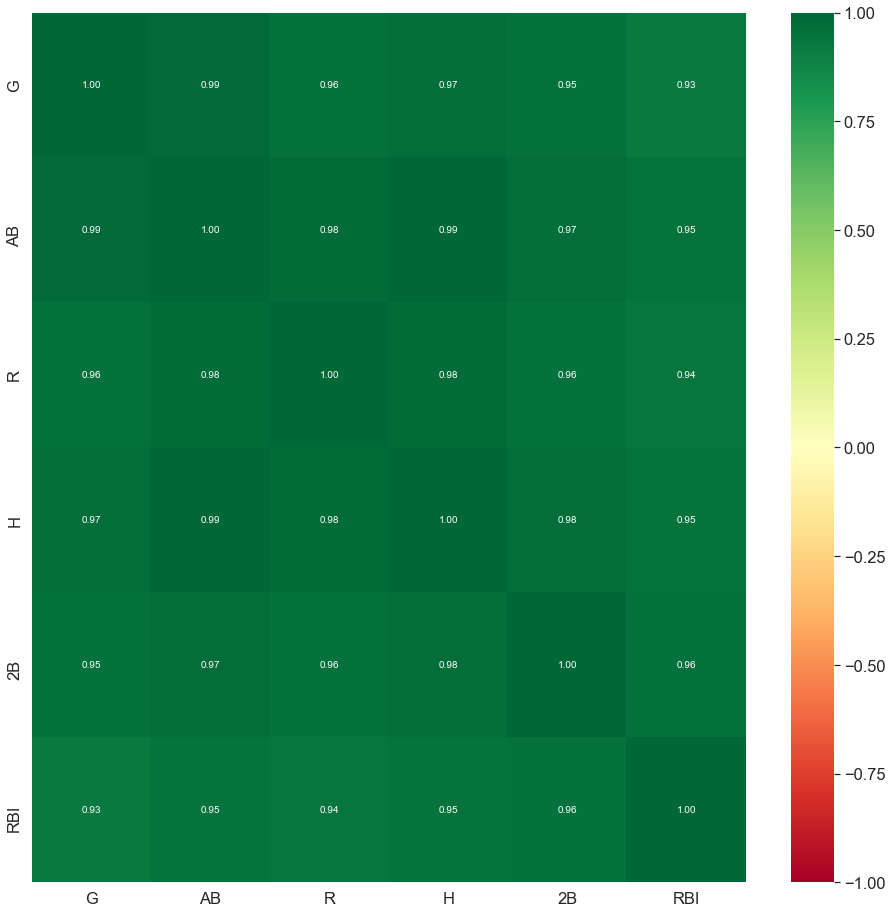

In [69]:
plt.figure(figsize=(16,16))
f = cb_.drop_duplicates(subset=['playerID','salary'])
f['ln(salary)']=np.log(f['salary'])
sns.heatmap(f[f['yearID']<2015].drop('salary',axis=1)[['G','AB','R','H','2B','RBI']].corr(), annot=True, 
            annot_kws={"size": 10},vmin=-1,vmax=1, fmt=".2f", cmap="RdYlGn").get_figure().savefig('window{}'.format(11))